In [ ]:
#RCN plots for Figure 4: MART1 loss and the surrounding TME (RCN identity)

In [1]:
import sys
import os
import anndata as ad
import pandas as pd
import scanpy as sc
import re
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import scimap as sm  
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from scipy.stats import pearsonr

#set current directory
os.chdir("C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/data")
import napari

Running SCIMAP  2.1.0


In [3]:
adata = ad.read(r"C:\Users\tav9\HMS Dropbox\Tuulia Vallius\PCA_phaseII\cycif_analysis_materials\data\e24_RCN_branch_mapping_11142024.h5ad")

C:\Users\tav9\AppData\Local\anaconda3\envs\scimap_new\lib\site-packages\anndata\__init__.py:55: FutureWarning:

`anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.



In [4]:
adata2=ad.read('C:/Users/tav9/Dropbox (HMS)/PCA_phaseII/cycif_analysis_materials/data/TV/subset_RCN_GeoMX_added_12152023.h5ad')

C:\Users\tav9\AppData\Local\anaconda3\envs\scimap_new\lib\site-packages\anndata\__init__.py:55: FutureWarning:

`anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.



In [5]:
adata2

AnnData object with n_obs × n_vars = 1009865 × 46
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'ROI_major_category', 'ROI_minor_category', 'phenotype', 'phenotype_v2', 'MELid', 'PCNApos', 'KI67pos', 'MARTpos', 'lineage', 'lineage_grouped', 'lose_08032023', 'proliferation', 'proliferation2', 'prolif2_lineage', 'imageid_raw', 'phenotype_lineage', 'spatial_cluster_kmeans', 'spatial_cluster_kmeans_5', 'spatial_cluster_kmeans_10', 'spatial_cluster_kmeans_15', 'spatial_cluster_kmeans_20', 'spatial_cluster_kmeans_25', 'spatial_cluster_kmeans_30', 'spatial_cluster_kmeans_35', 'spatial_cluster_kmeans_40', 'spatial_cluster_kmeans_45', 'ROI_GeoMX', 'IRF1pos', 'IRF1pos_phenotype_lineage'
    uns: 'all_markers', 'gates', 'lineage_colors', 'spatial_count', 'spatial_distance', 'spatial_distance_IRF1'

In [12]:
adata.write_h5ad(r'C:\Users\tav9\HMS Dropbox\Tuulia Vallius\2024-Vallius-Novikov-Shi-Melanoma_PCA\data\e24\RCN\e24_RCN_data.h5ad')

In [6]:
adata2.obs['index_col']=adata2.obs.index
adata.obs['index_col']=adata.obs.index

common_column = 'index_col'
adata.obs = adata.obs.join(adata2.obs[['ROI_GeoMX']], on=common_column, how='left')

In [7]:
adata

AnnData object with n_obs × n_vars = 1208962 × 46
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'ROI_major_category', 'ROI_minor_category', 'phenotype', 'phenotype_v2', 'MELid', 'PCNApos', 'KI67pos', 'MARTpos', 'lineage', 'lineage_grouped', 'lose_08032023', 'proliferation', 'proliferation2', 'prolif2_lineage', 'imageid_raw', 'MART1pos', 'spatial_cluster_kmeans_25', 'spatial_cluster_grouped', 'index_col', 'ROI_GeoMX'
    uns: 'all_markers', 'gates', 'lineage_colors', 'spatial_count_MART', 'spatial_distance_MART'

In [11]:
df=adata.to_df(layer=None)
df['MART1pos']=adata.obs['MART1pos']
df['spatial_cluster_grouped']=adata.obs['spatial_cluster_grouped']
df['MELid']=adata.obs['MELid']

In [12]:
def calculate_proportions(df, celltype, location_col, sample_col):
    """Calculates the proportions of a given cell type in different locations for each sample.

    Args:
        df: The input pandas DataFrame.
        celltype: The cell type to analyze.
        location_col: The name of the column containing location information.
        sample_col: The name of the column containing sample ID information.

    Returns:
        A pandas DataFrame containing the calculated proportions.
    """

    # Filter the DataFrame for the specified cell type
    filtered_df = df[df["MART1pos"] == celltype]

    # Group by location and sample, count occurrences, and calculate proportions
    proportions_df = filtered_df.groupby([location_col, sample_col]).size().reset_index(name="count")
    proportions_df["proportion"] = proportions_df["count"] / proportions_df.groupby(sample_col)["count"].transform("sum")

    return proportions_df

In [13]:
proportions_df_MART1pos=calculate_proportions(df=df, celltype='MART1+', location_col='spatial_cluster_grouped', sample_col='MELid')

C:\Users\tav9\AppData\Local\Temp\ipykernel_64332\2392465522.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\tav9\AppData\Local\Temp\ipykernel_64332\2392465522.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [14]:
proportions_df_MART1pos

spatial_cluster_grouped  MELid  count  proportion
0                 Epidermis  MEL14   2896    0.350478
1                 Epidermis  MEL17     71    0.037173
2                 Epidermis  MEL18   3190    0.222052
3                 Epidermis  MEL19    688    0.034651
4                 Epidermis  MEL23   9476    0.195426
..                      ...    ...    ...         ...
155            Tumor-stroma  MEL52    429    0.108388
156            Tumor-stroma  MEL54   5828    0.166263
157            Tumor-stroma  MEL56    343    0.078132
158            Tumor-stroma  MEL58  10586    0.212737
159            Tumor-stroma  MEL65   1489    0.113129

[160 rows x 4 columns]

In [15]:
MART1pos=['MEL36','MEL16','MEL66','MEL17','MEL40','MEL33','MEL60','MEL52','MEL56','MEL50','MEL15','MEL21','MEL38','MEL42','MEL44','MEL53','MEL26','MEL49','MEL23','MEL25','MEL51','MEL64','MEL45','MEL14','MEL19','MEL68','MEL24','MEL27','MEL18','MEL69','MEL65','MEL48','MEL47','MEL54','MEL86','MEL59','MEL20','MEL81','MEL85','MEL78','MEL73','MEL77','MEL80','MEL76','MEL84','MEL58','MEL55']

def apply_status(image_id):
    if image_id in MART1pos:
        return 'MART1+'   

proportions_df_MART1pos['MARTpos']=proportions_df_MART1pos['MELid'].apply(apply_status)
proportions_df_MART1pos.dropna(axis=0, inplace=True)
print(proportions_df_MART1pos)

    spatial_cluster_grouped  MELid  count  proportion MARTpos
0                 Epidermis  MEL14   2896    0.350478  MART1+
1                 Epidermis  MEL17     71    0.037173  MART1+
2                 Epidermis  MEL18   3190    0.222052  MART1+
3                 Epidermis  MEL19    688    0.034651  MART1+
4                 Epidermis  MEL23   9476    0.195426  MART1+
..                      ...    ...    ...         ...     ...
155            Tumor-stroma  MEL52    429    0.108388  MART1+
156            Tumor-stroma  MEL54   5828    0.166263  MART1+
157            Tumor-stroma  MEL56    343    0.078132  MART1+
158            Tumor-stroma  MEL58  10586    0.212737  MART1+
159            Tumor-stroma  MEL65   1489    0.113129  MART1+

[152 rows x 5 columns]


In [16]:
proportions_df_MART1neg=calculate_proportions(df=df, celltype='MART1-', location_col='spatial_cluster_grouped', sample_col='MELid')
proportions_df_MART1neg

C:\Users\tav9\AppData\Local\Temp\ipykernel_64332\2392465522.py:18: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\tav9\AppData\Local\Temp\ipykernel_64332\2392465522.py:19: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



spatial_cluster_grouped  MELid  count  proportion
0                 Epidermis  MEL14    171    0.370130
1                 Epidermis  MEL17      0    0.000000
2                 Epidermis  MEL18      0    0.000000
3                 Epidermis  MEL19     49    0.158576
4                 Epidermis  MEL23      0         NaN
..                      ...    ...    ...         ...
155            Tumor-stroma  MEL52      3    0.010345
156            Tumor-stroma  MEL54    149    0.133036
157            Tumor-stroma  MEL56      0    0.000000
158            Tumor-stroma  MEL58    697    0.271523
159            Tumor-stroma  MEL65      0    0.000000

[160 rows x 4 columns]

In [18]:
MART1neg=['MEL36','MEL16','MEL66','MEL17','MEL40','MEL33','MEL60','MEL52','MEL56','MEL50','MEL15','MEL21','MEL38','MEL42','MEL44','MEL53','MEL26','MEL49','MEL23','MEL25','MEL51','MEL64','MEL45','MEL14','MEL19','MEL68','MEL24','MEL27','MEL18','MEL69','MEL65','MEL48','MEL47','MEL54','MEL86','MEL59','MEL20','MEL81','MEL85','MEL78','MEL73','MEL77','MEL80','MEL76','MEL84','MEL58','MEL55']

def apply_status(image_id):
    if image_id in MART1neg:
        return 'MART1-'   

proportions_df_MART1neg['MARTpos']=proportions_df_MART1neg['MELid'].apply(apply_status)
proportions_df_MART1neg.dropna(axis=0, inplace=True)
proportions_df_MART1neg

spatial_cluster_grouped  MELid  count  proportion MARTpos
0                 Epidermis  MEL14    171    0.370130  MART1-
1                 Epidermis  MEL17      0    0.000000  MART1-
2                 Epidermis  MEL18      0    0.000000  MART1-
3                 Epidermis  MEL19     49    0.158576  MART1-
5                 Epidermis  MEL24      0    0.000000  MART1-
..                      ...    ...    ...         ...     ...
155            Tumor-stroma  MEL52      3    0.010345  MART1-
156            Tumor-stroma  MEL54    149    0.133036  MART1-
157            Tumor-stroma  MEL56      0    0.000000  MART1-
158            Tumor-stroma  MEL58    697    0.271523  MART1-
159            Tumor-stroma  MEL65      0    0.000000  MART1-

[144 rows x 5 columns]

In [23]:
proportions_df_MART1neg['spatial_cluster_grouped'].value_counts()

spatial_cluster_grouped
Epidermis                18
Epidermis_MIS            18
Mixed_immune/stroma      18
Myeloid/macrophage       18
Perivascular/vascular    18
T_cell                   18
Tumor                    18
Tumor-stroma             18
Name: count, dtype: int64

In [19]:
frames=[proportions_df_MART1pos,proportions_df_MART1neg]
merged_df_2=pd.concat(frames)

C:\Users\tav9\AppData\Local\Temp\ipykernel_64332\2273688641.py:4: FutureWarning:



Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.


C:\Users\tav9\AppData\Local\Temp\ipykernel_64332\2273688641.py:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



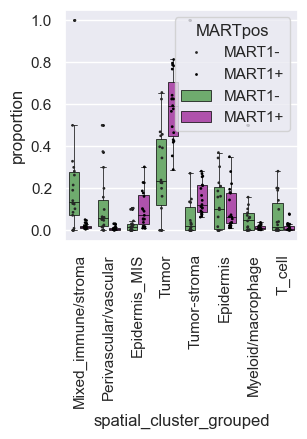

In [33]:
my_pal = {"MART1-": "#65b564", "MART1+": "#bf42ba"}

sns.set(rc={"figure.figsize":(3, 3)})
ax=sns.stripplot(data=merged_df_2, x="spatial_cluster_grouped", y="proportion", hue="MARTpos", dodge=True, color='black', s=2,
                 order=['Mixed_immune/stroma','Perivascular/vascular','Epidermis_MIS','Tumor','Tumor-stroma','Epidermis', 'Myeloid/macrophage','T_cell'],
                hue_order=['MART1-','MART1+'])
ax=sns.boxplot(data=merged_df_2, x="spatial_cluster_grouped", y="proportion", hue="MARTpos", fill=True, gap=.1,fliersize=1,palette=my_pal,
               order=['Mixed_immune/stroma','Perivascular/vascular','Epidermis_MIS','Tumor','Tumor-stroma','Epidermis', 'Myeloid/macrophage','T_cell'],
              linecolor='black', hue_order=['MART1-','MART1+'], linewidth=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#ax.set_ylim([-0.05, 0.85]) 

plt.savefig("C:/Users/tav9/Dropbox (HMS)/test/test/spatial_cluster_grouped_MART1_status_fig4.pdf")

In [45]:
adata

AnnData object with n_obs × n_vars = 1208962 × 46
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'ROI_major_category', 'ROI_minor_category', 'phenotype', 'phenotype_v2', 'MELid', 'PCNApos', 'KI67pos', 'MARTpos', 'lineage', 'lineage_grouped', 'lose_08032023', 'proliferation', 'proliferation2', 'prolif2_lineage', 'imageid_raw', 'MART1pos', 'spatial_cluster_kmeans_25', 'spatial_cluster_grouped', 'index_col', 'ROI_GeoMX'
    uns: 'all_markers', 'gates', 'lineage_colors', 'spatial_count_MART', 'spatial_distance_MART'

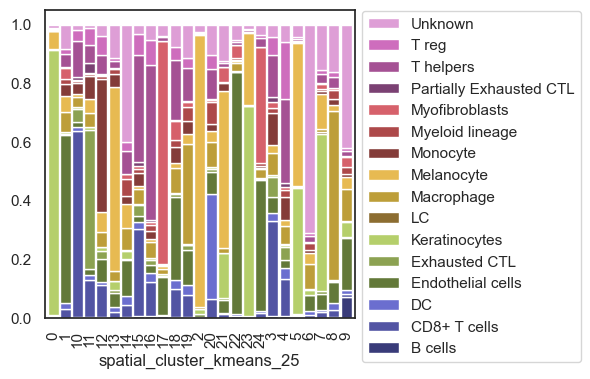

In [7]:
#x=['normal','precursor','MIS','RGP','VGP']

data=sm.pl.stacked_barplot(adata, y_axis='phenotype_v2', x_axis='spatial_cluster_kmeans_25', 
                      subset_xaxis=None, subset_yaxis=None, order_xaxis=None, order_yaxis=None, matplotlib_cmap='tab20b',figsize=(4,4), method='percent',
                     return_data=True)

In [39]:
data

phenotype_v2                B cells  CD8+ T cells        DC  \
spatial_cluster_kmeans_25                                     
0                          0.000023      0.001605  0.000379   
1                          0.000824      0.030989  0.020201   
10                         0.002667      0.635996  0.011344   
11                         0.004093      0.126002  0.015613   
12                         0.001228      0.109736  0.012377   
13                         0.000669      0.020908  0.015540   
14                         0.002493      0.041865  0.029822   
15                         0.005303      0.297199  0.024161   
16                         0.004700      0.116457  0.032188   
17                         0.000381      0.005929  0.004841   
18                         0.002411      0.097560  0.028588   
19                         0.002370      0.076211  0.033990   
2                          0.000038      0.001637  0.002188   
20                         0.001035      0.062728  0.358283   
21                         0.000189      0.012787  0.003126   
22                         0.000118      0.006817  0.005560   
23                         0.000080      0.002406  0.000829   
24                         0.000370      0.015096  0.007826   
3                          0.004695      0.325488  0.025781   
4                          0.005404      0.125925  0.038807   
5                          0.000089      0.003919  0.002810   
6                          0.001016      0.008713  0.013206   
7                          0.000578      0.018364  0.008787   
8                          0.001365      0.026980  0.022266   
9                          0.072543      0.009477  0.013702   

phenotype_v2               Endothelial cells  Exhausted CTL  Keratinocytes  \
spatial_cluster_kmeans_25                                                    
0                                   0.005270       0.001302       0.905660   
1                                   0.570385       0.004707       0.006868   
10                                  0.018848       0.043148       0.006156   
11                                  0.020846       0.473415       0.009072   
12                                  0.077968       0.027710       0.013003   
13                                  0.048182       0.009647       0.028954   
14                                  0.121890       0.002890       0.029292   
15                                  0.022202       0.034480       0.003506   
16                                  0.026280       0.018530       0.004335   
17                                  0.129413       0.000816       0.008214   
18                                  0.283701       0.011302       0.002179   
19                                  0.117311       0.016880       0.002370   
2                                   0.007605       0.001091       0.018705   
20                                  0.074012       0.012220       0.005125   
21                                  0.045747       0.005399       0.154006   
22                                  0.825645       0.000727       0.001395   
23                                  0.001976       0.002040       0.714447   
24                                  0.447418       0.002362       0.003936   
3                                   0.054428       0.068679       0.007125   
4                                   0.026839       0.043631       0.008378   
5                                   0.004563       0.002147       0.430627   
6                                   0.054661       0.000430       0.018442   
7                                   0.054910       0.010216       0.534813   
8                                   0.071699       0.004156       0.001861   
9                                   0.176659       0.003412       0.051205   

phenotype_v2                     LC  Macrophage  Melanocyte  Monocyte  \
spatial_cluster_kmeans_25                                               
0                          0.000962    0.0005

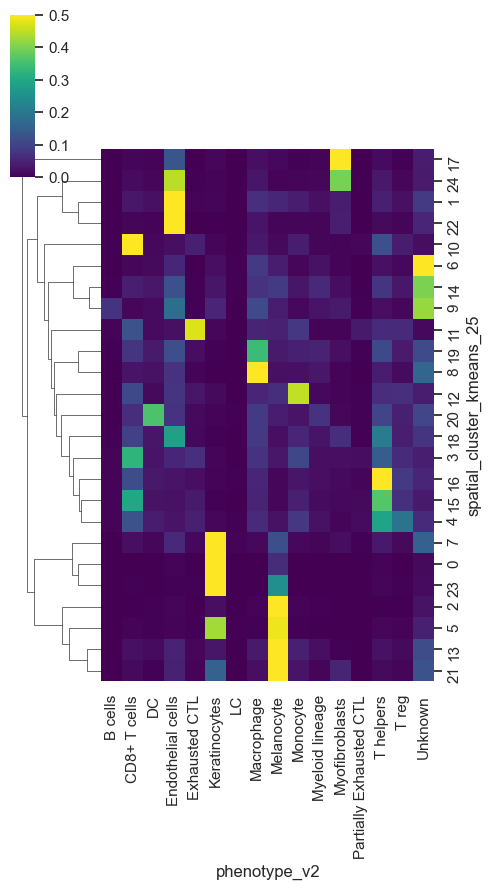

In [40]:
sns.clustermap(data, cmap="viridis", vmin=0, vmax=0.5, col_cluster=False, figsize=(5,9))
#plt.savefig(r'C:\Users\tav9\Dropbox (HMS)\2024-Vallius-Novikov-Shi-Melanoma_PCA\data\e24\RCN\output.pdf')

In [31]:
lut

{'Epidermis': 'r',
 'Epidermis_MIS': 'b',
 'Tumor-stroma': 'g',
 'Tumor': 'c',
 'T_cell': 'm',
 'Perivascular/vascular': 'y',
 'Myeloid/macrophage': 'k',
 'Mixed_immune/stroma': 'w'}

In [10]:
adata

AnnData object with n_obs × n_vars = 1208962 × 46
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'ROI', 'ROI_major_category', 'ROI_minor_category', 'phenotype', 'phenotype_v2', 'MELid', 'PCNApos', 'KI67pos', 'MARTpos', 'lineage', 'lineage_grouped', 'lose_08032023', 'proliferation', 'proliferation2', 'prolif2_lineage', 'imageid_raw', 'MART1pos', 'spatial_cluster_kmeans_25', 'spatial_cluster_grouped', 'index_col', 'ROI_GeoMX'
    uns: 'all_markers', 'gates', 'lineage_colors', 'spatial_count_MART', 'spatial_distance_MART'

In [13]:
adata.obs.ROI_GeoMX.value_counts()

ROI_GeoMX
Other           712003
undefined        35241
LSP13943_008      3206
LSP13135_029      3205
LSP13165_007      3108
                 ...  
LSP13145_042        16
LSP13145_018         3
LSP13135_043         3
LSP13150_034         1
LSP13145_003         1
Name: count, Length: 267, dtype: int64

In [2]:
#Image path

LSP11563 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11563/registration/LSP11563.ome.tif"
LSP11523 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11523/registration/LSP11523.ome.tif"
LSP11587 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11587/registration/LSP11587.ome.tif"
LSP11747 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11747/registration/LSP11747.ome.tif"
LSP11411 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/re-processed/LSP11411/registration/LSP11411.ome.tif"
LSP11691 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11691/registration/LSP11691.ome.tif"
LSP11483 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11483/registration/LSP11483.ome.tif"
LSP11595 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11595/registration/LSP11595.ome.tif"
LSP11627 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11627/registration/LSP11627.ome.tif"
LSP11315 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11315/registration/LSP11315.ome.tif"
LSP11419 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/re-processed/LSP11419/registration/LSP11419.ome.tif"
LSP11355 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11355/registration/LSP11355.ome.tif"
LSP11387 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11387/registration/LSP11387.ome.tif"
LSP11403 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11403/registration/LSP11403.ome.tif"
LSP11339 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11339/registration/LSP11339.ome.tif"
LSP11667 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11667/registration/LSP11667.ome.tif"
LSP11347 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11347/registration/LSP11347.ome.tif"
LSP11395 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11395/registration/LSP11395.ome.tif"
LSP11467 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11467/registration/LSP11467.ome.tif"
LSP12422 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP12422/registration/LSP12422.ome.tif"
LSP11643 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11643/registration/LSP11643.ome.tif"
LSP11515 = "Y:/cycif-production/16-Pre-Cancer-Atlas-for-Melanoma/PCAII_p16_e24/mcmicro_done/13Cycles/LSP11515/registration/LSP11515.ome.tif"

In [11]:
#list of all markers in the CYCIF image
all_markers = ['DNA1','MART1','CD207','SOX10','DNA2','GZMB','CD163','CD1c','KRT14','DNA3','CD3e','CD11c','CD8a','aSMA','DNA4','CD20',
           'CD68','PDL1','DNA5','MITF','FOXP3','PD1','panCK','DNA6','CD16','CD206','CD31','Vim','DNA7','S100A','LAG3','CD56',
           'pS6','DNA8','HLA-A/B','SOX9','HLA-DPB1','PCNA','DNA9','CD14','CD66b','CD45','pH3','DNA10','LMNB2','Nestin',
           'H3K27Me3','DNA11','PRAME','TIGIT','TIM3','DNA12','CD57','cPARP','Ki67_1','DNA13','CD4','Ki67_2','IRF1']


sm.pl.image_viewer(image_path = LSP11347, adata=adata, overlay='spatial_cluster_kmeans_25', 
                   channel_names=all_markers, x_coordinate='X_centroid', y_coordinate='Y_centroid', 
                   point_size=15, subset='MEL18', imageid='MELid')

In [60]:
adata.obs.MELid.value_counts()

MELid
MEL23    182575
MEL58    175439
MEL18    108252
MEL27     97179
MEL14     96420
MEL25     83763
MEL54     65964
MEL19     55252
MEL24     54510
MEL48     51929
MEL47     42598
MEL52     41186
MEL26     38380
MEL50     26737
MEL65     23306
MEL56     15652
MEL39     13417
MEL44     13273
MEL38     12691
MEL17     10439
Name: count, dtype: int64

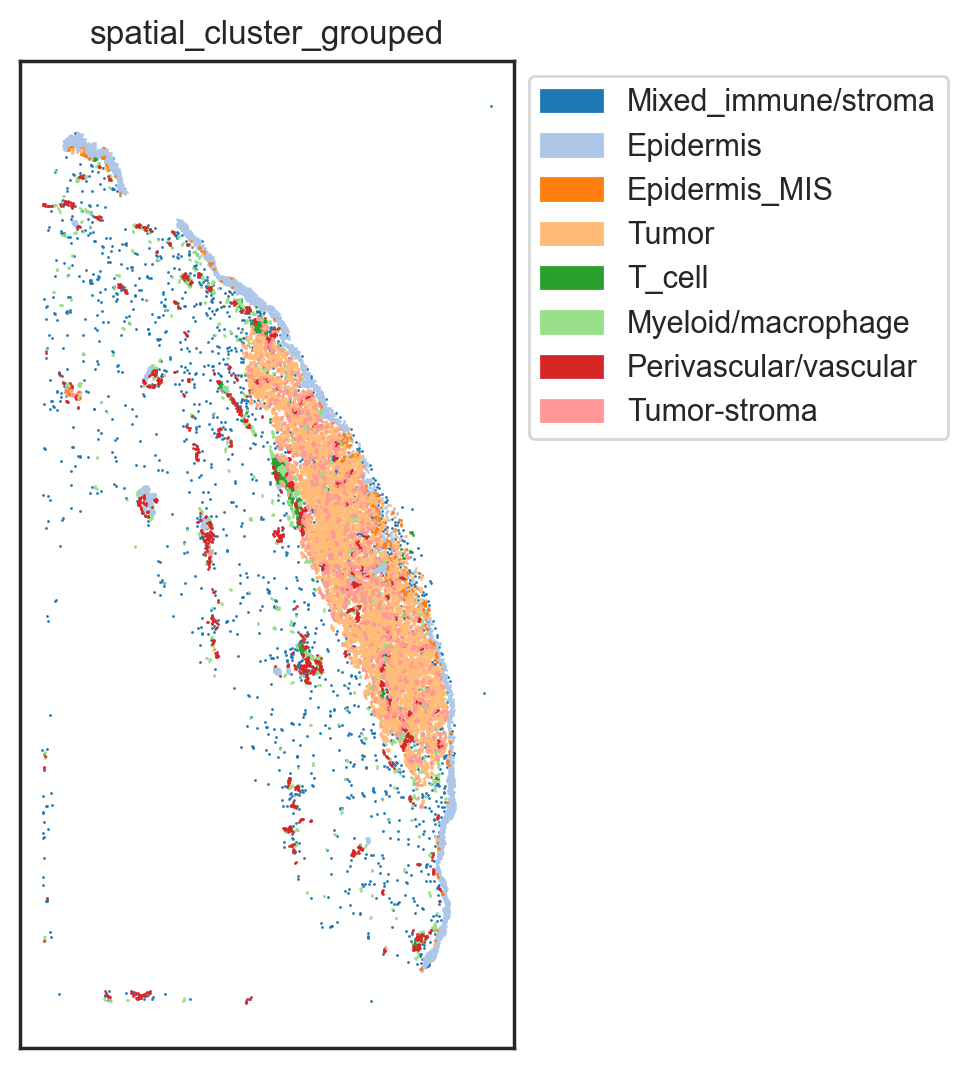

In [88]:
mel=['MEL65']
MEL65=adata[(adata.obs['MELid'].isin(mel))]

tmp = MEL65[MEL65.obs['Y_centroid'] > 0 ]
#tmp = tmp[tmp.obs['Y_centroid'] < 25000 ]

tmp = tmp[tmp.obs['X_centroid'] > 0 ]
#tmp = tmp[tmp.obs['X_centroid'] < 43000 ]

sm.pl.spatial_scatterPlot(adata=tmp, colorBy=['spatial_cluster_grouped'], x_coordinate='X_centroid', 
                          y_coordinate='Y_centroid',
                          imageid='MELid', layer=None, subset='MEL65', s=1, figsize=(5,5.5),vmin=0.1,vmax=0.9)

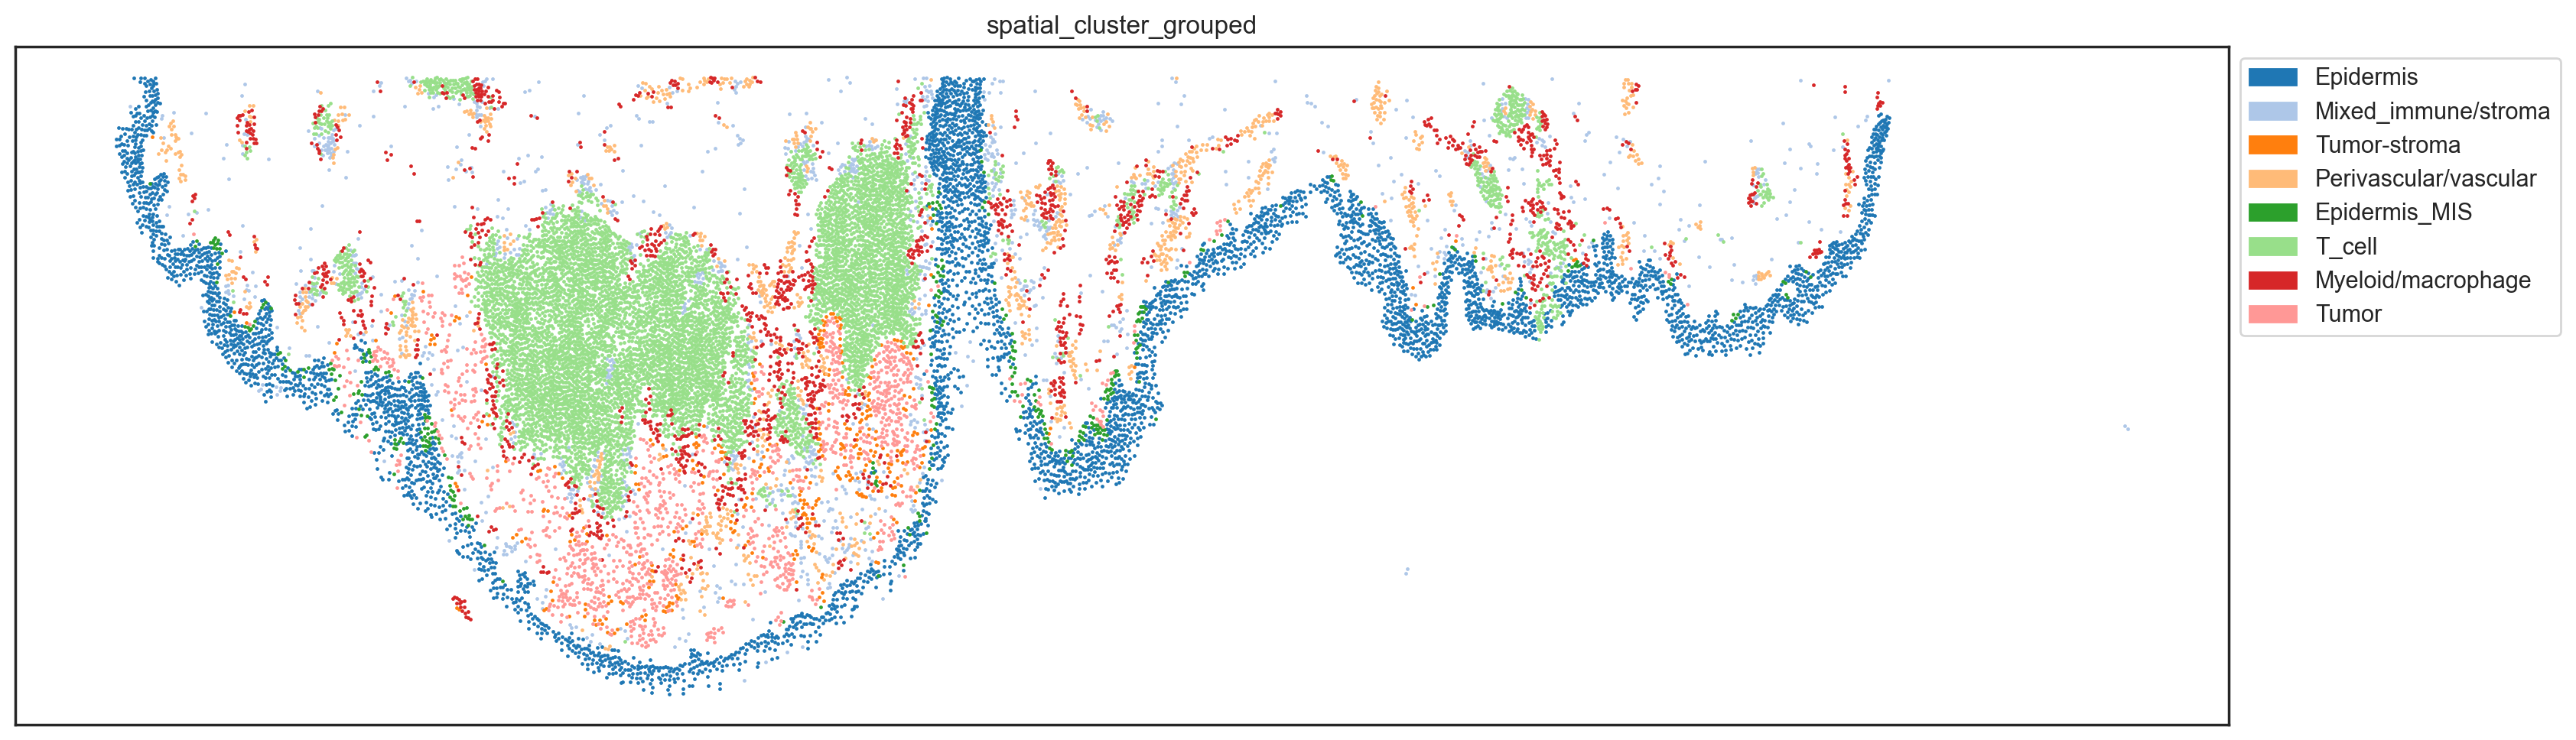

In [102]:
mel=['MEL52']
MEL52=adata[(adata.obs['MELid'].isin(mel))]

tmp = MEL52[MEL52.obs['Y_centroid'] > 32000 ]
#tmp = tmp[tmp.obs['Y_centroid'] < 25000 ]

tmp = tmp[tmp.obs['X_centroid'] > 0 ]
#tmp = tmp[tmp.obs['X_centroid'] < 43000 ]

sm.pl.spatial_scatterPlot(adata=tmp, colorBy=['spatial_cluster_grouped'], x_coordinate='X_centroid', 
                          y_coordinate='Y_centroid',
                          imageid='MELid', layer=None, subset='MEL52', s=3, figsize=(17,5),vmin=0.1,vmax=0.9)

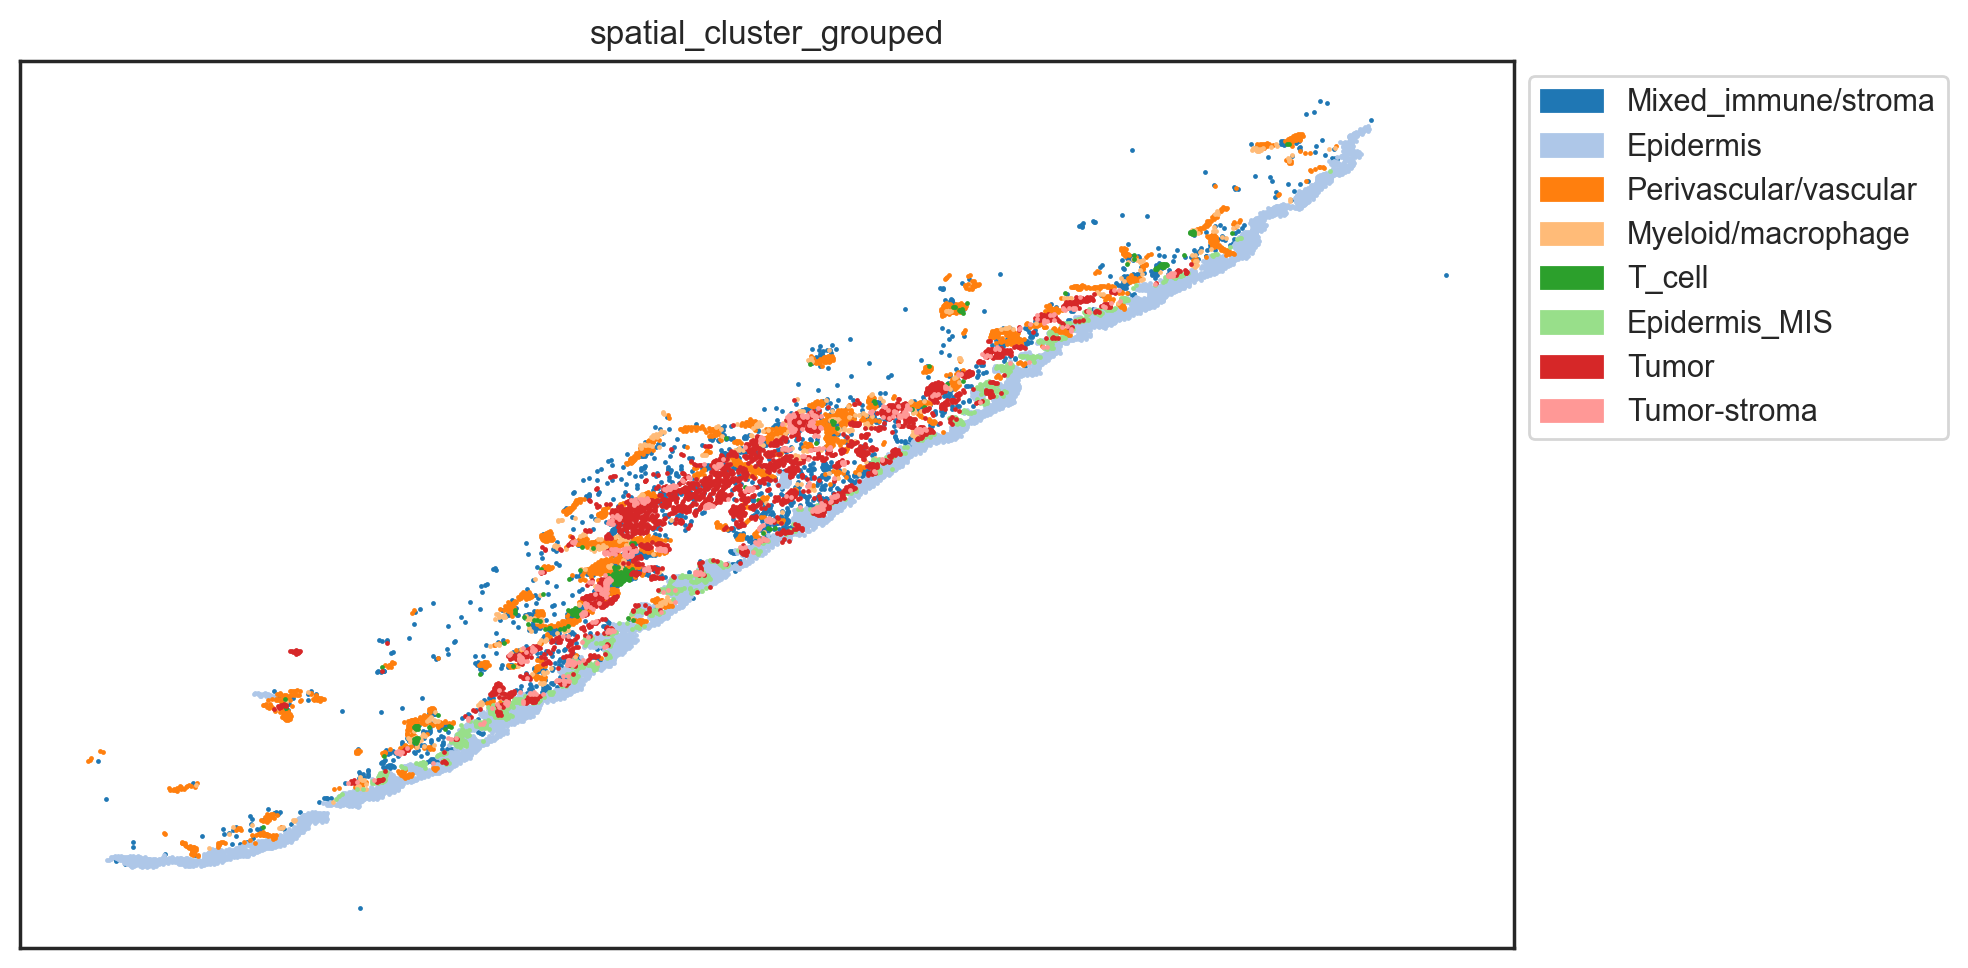

In [107]:
mel=['MEL50']
MEL50=adata[(adata.obs['MELid'].isin(mel))]

tmp = MEL50[MEL50.obs['Y_centroid'] > 0 ]
#tmp = tmp[tmp.obs['Y_centroid'] < 25000 ]

tmp = tmp[tmp.obs['X_centroid'] > 20000 ]
#tmp = tmp[tmp.obs['X_centroid'] < 43000 ]

sm.pl.spatial_scatterPlot(adata=tmp, colorBy=['spatial_cluster_grouped'], x_coordinate='X_centroid', 
                          y_coordinate='Y_centroid',
                          imageid='MELid', layer=None, subset='MEL50', s=3, figsize=(10,5),vmin=0.1,vmax=0.9)

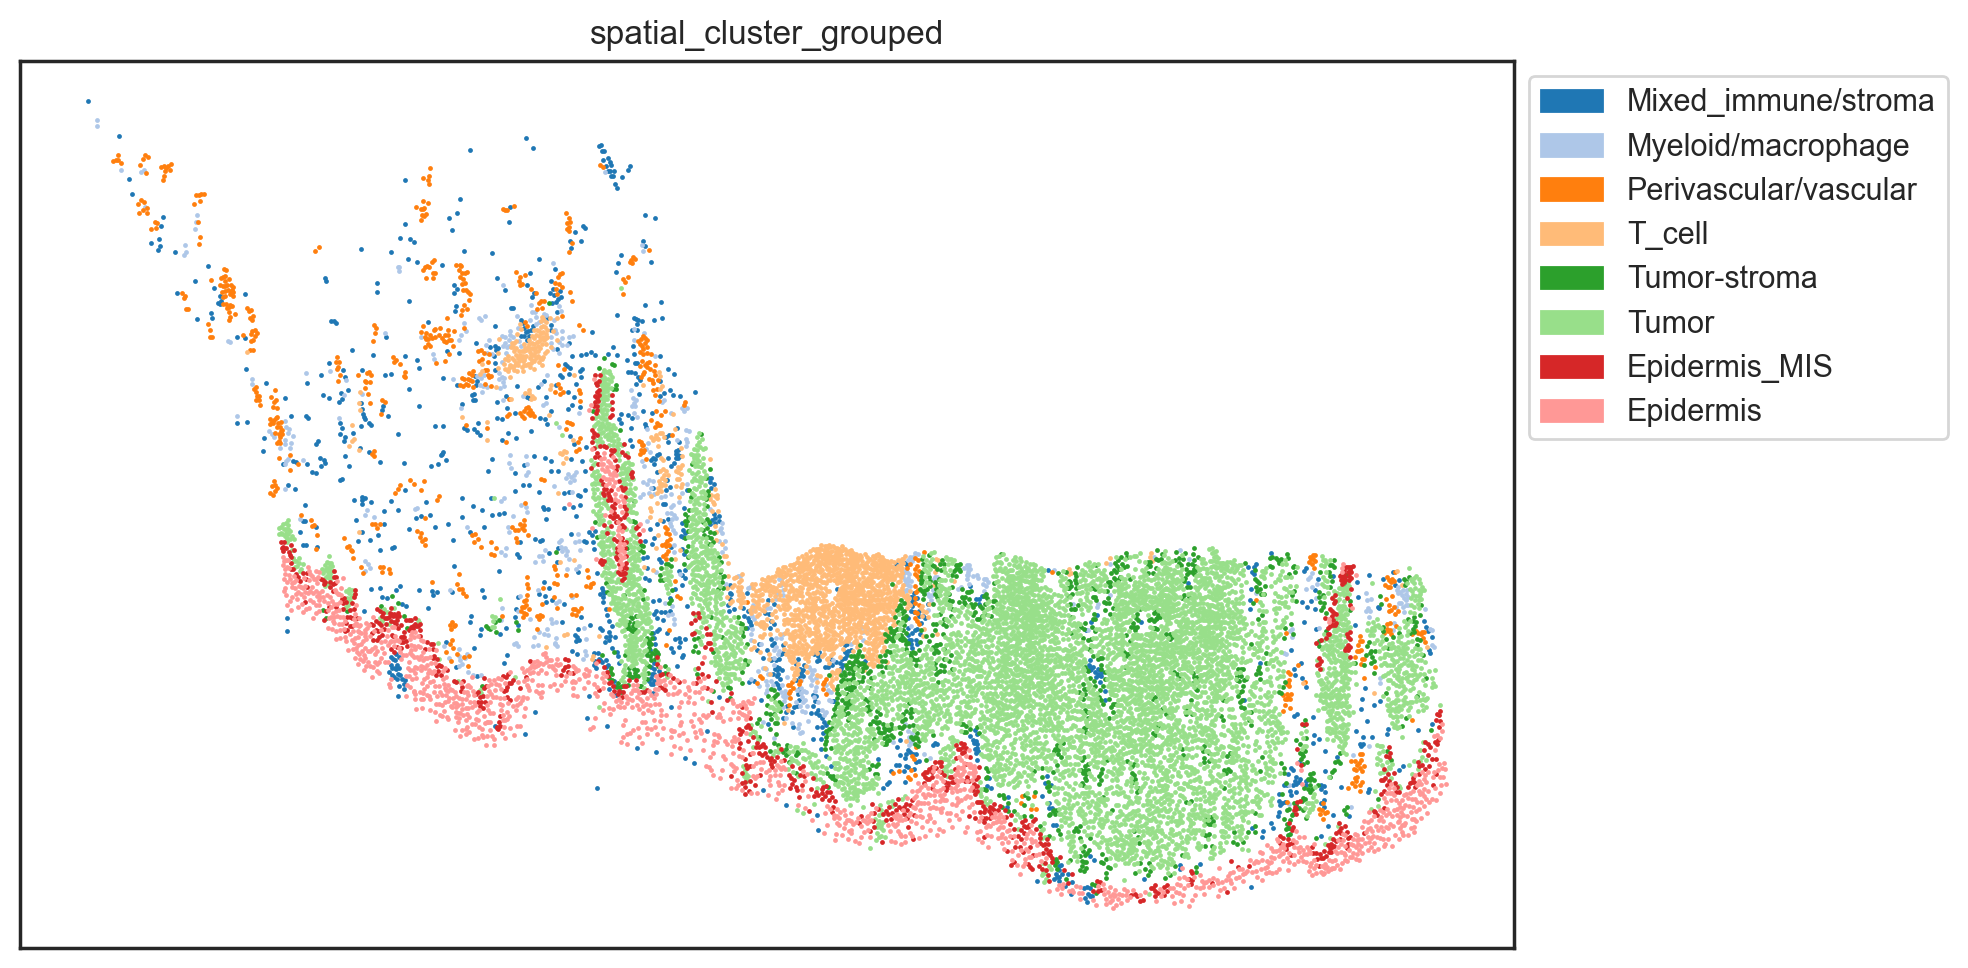

In [109]:
mel=['MEL44']
MEL44=adata[(adata.obs['MELid'].isin(mel))]

tmp = MEL44[MEL44.obs['Y_centroid'] > 0 ]
#tmp = tmp[tmp.obs['Y_centroid'] < 25000 ]

tmp = tmp[tmp.obs['X_centroid'] > 0 ]
#tmp = tmp[tmp.obs['X_centroid'] < 43000 ]

sm.pl.spatial_scatterPlot(adata=tmp, colorBy=['spatial_cluster_grouped'], x_coordinate='X_centroid', 
                          y_coordinate='Y_centroid',
                          imageid='MELid', layer=None, subset='MEL44', s=3, figsize=(10,5),vmin=0.1,vmax=0.9)

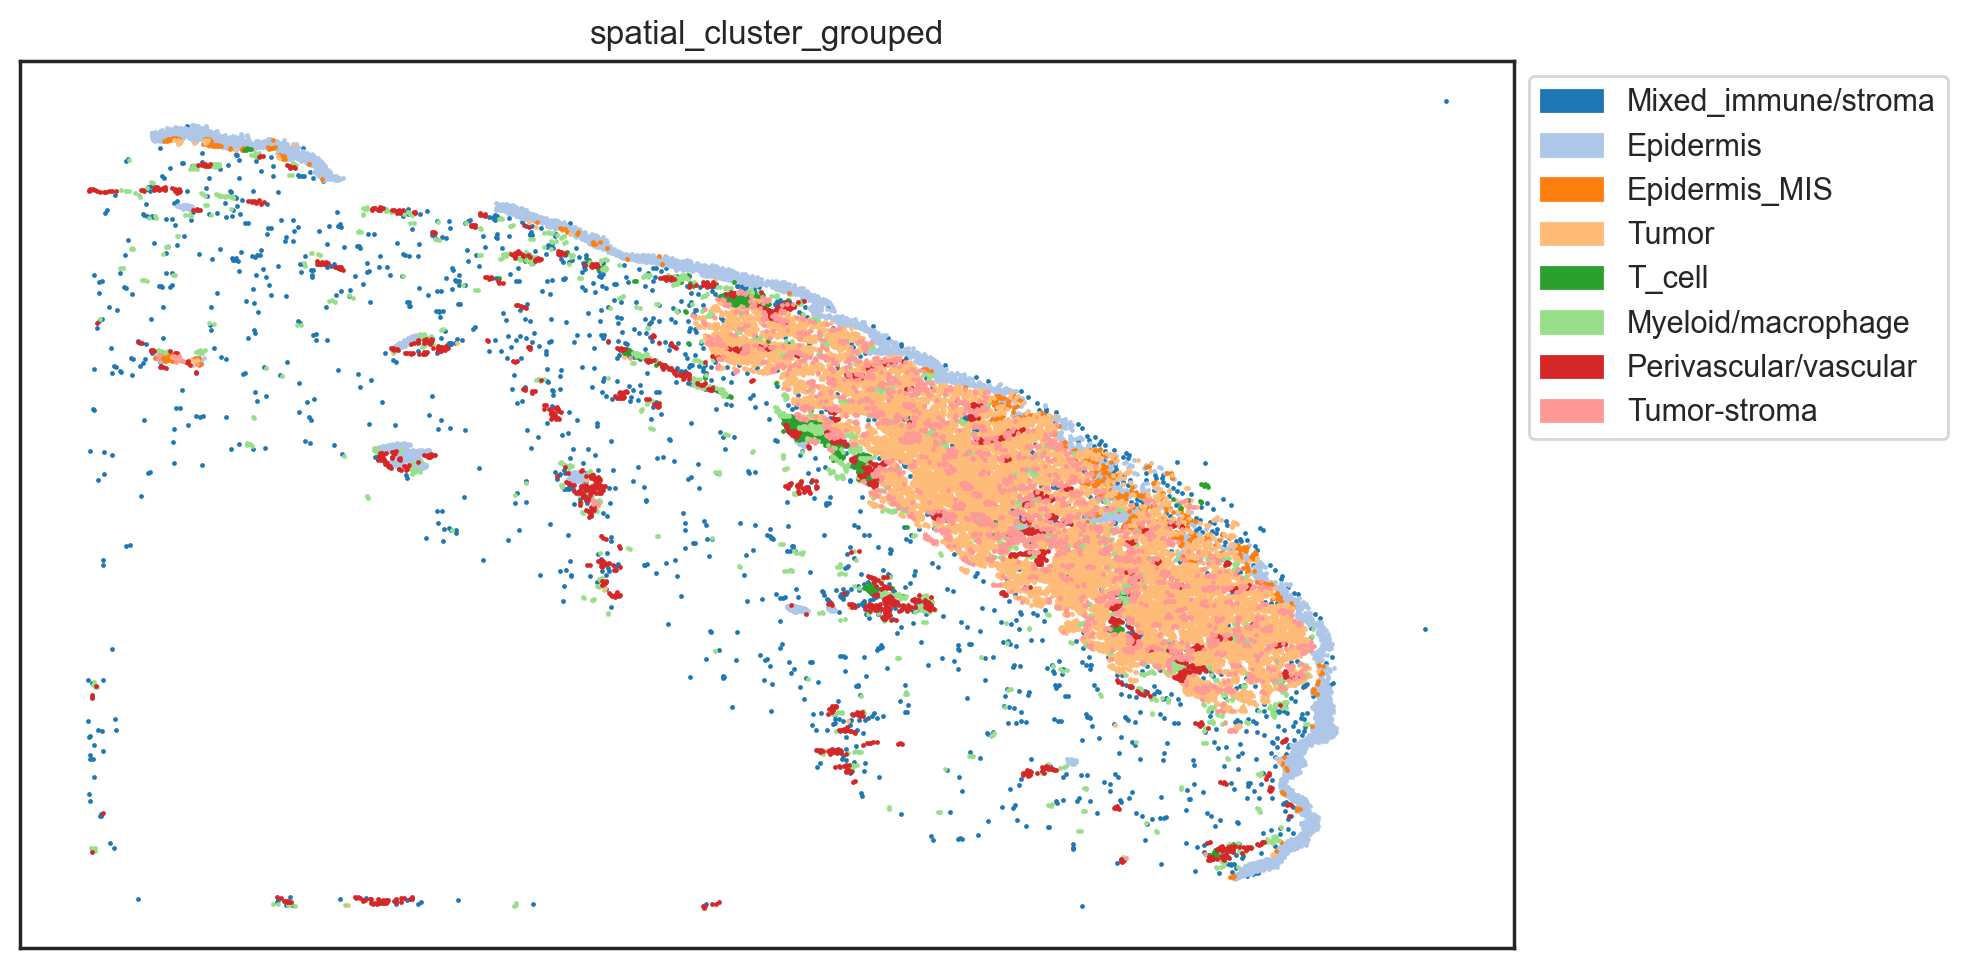

In [108]:
mel=['MEL65']
MEL65=adata[(adata.obs['MELid'].isin(mel))]

tmp = MEL65[MEL65.obs['Y_centroid'] > 0 ]
#tmp = tmp[tmp.obs['Y_centroid'] < 25000 ]

tmp = tmp[tmp.obs['X_centroid'] > 0 ]
#tmp = tmp[tmp.obs['X_centroid'] < 43000 ]

sm.pl.spatial_scatterPlot(adata=tmp, colorBy=['spatial_cluster_grouped'], x_coordinate='X_centroid', 
                          y_coordinate='Y_centroid',
                          imageid='MELid', layer=None, subset='MEL65', s=3, figsize=(10,5),vmin=0.1,vmax=0.9)

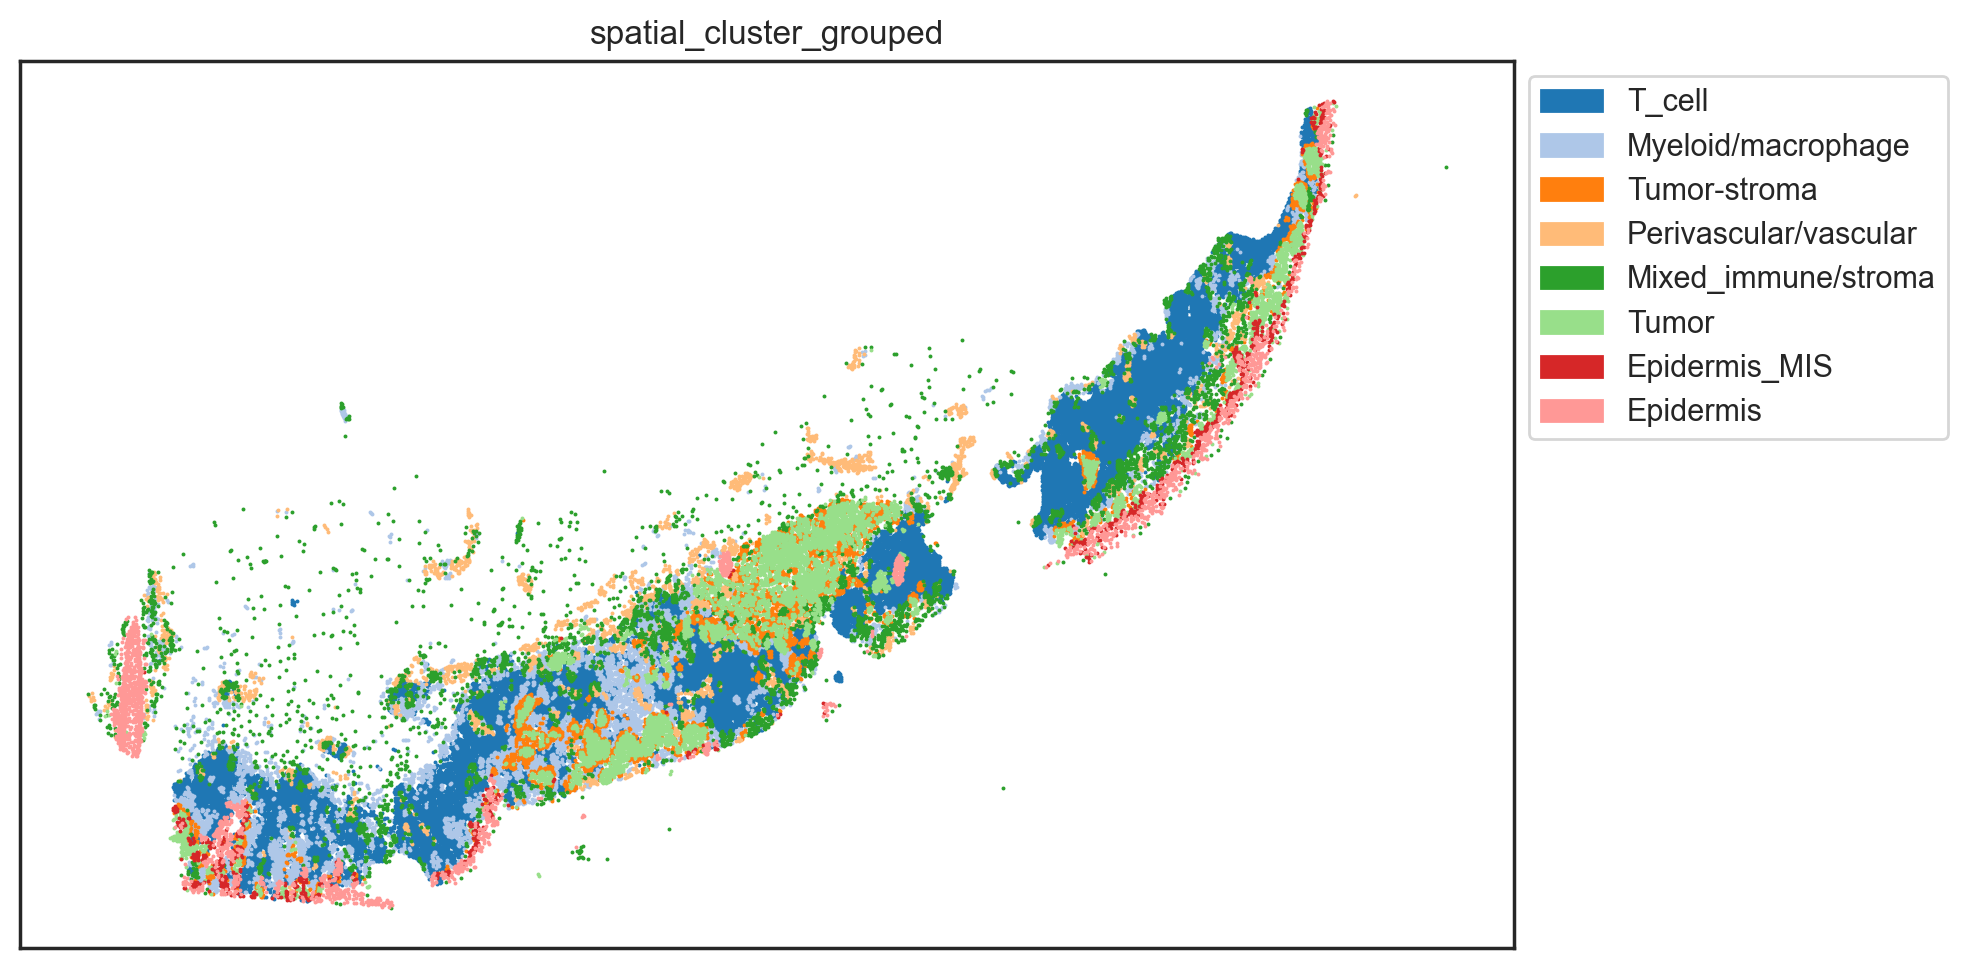

In [117]:
mel=['MEL25']
MEL25=adata[(adata.obs['MELid'].isin(mel))]

tmp = MEL25[MEL25.obs['Y_centroid'] > 29000 ]
#tmp = tmp[tmp.obs['Y_centroid'] < 25000 ]

tmp = tmp[tmp.obs['X_centroid'] > 0 ]
#tmp = tmp[tmp.obs['X_centroid'] < 43000 ]

sm.pl.spatial_scatterPlot(adata=tmp, colorBy=['spatial_cluster_grouped'], x_coordinate='X_centroid', 
                          y_coordinate='Y_centroid',
                          imageid='MELid', layer=None, subset='MEL25', s=2, figsize=(10,5),vmin=0.1,vmax=0.9)

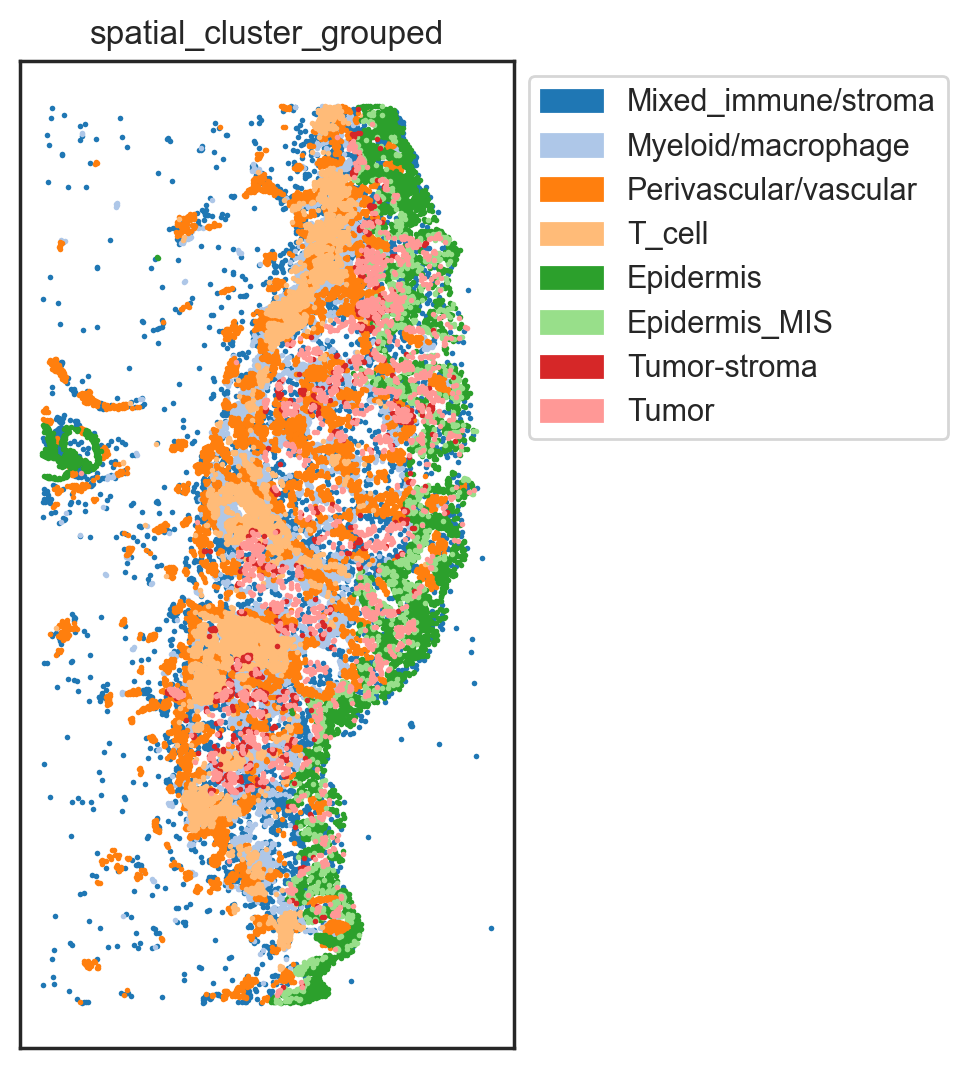

In [38]:
mel=['MEL14']
MEL14=adata[(adata.obs['MELid'].isin(mel))]

tmp = MEL14[MEL14.obs['Y_centroid'] > 15000 ]
tmp = tmp[tmp.obs['Y_centroid'] < 30000 ]

#tmp = tmp[tmp.obs['X_centroid'] < 27000 ]
tmp = tmp[tmp.obs['X_centroid'] > 43000 ]

sm.pl.spatial_scatterPlot(adata=tmp, colorBy=['spatial_cluster_grouped'], x_coordinate='X_centroid', 
                          y_coordinate='Y_centroid',
                          imageid='MELid', layer=None, subset='MEL14', s=4, figsize=(5,5.5),vmin=0.1,vmax=0.9)

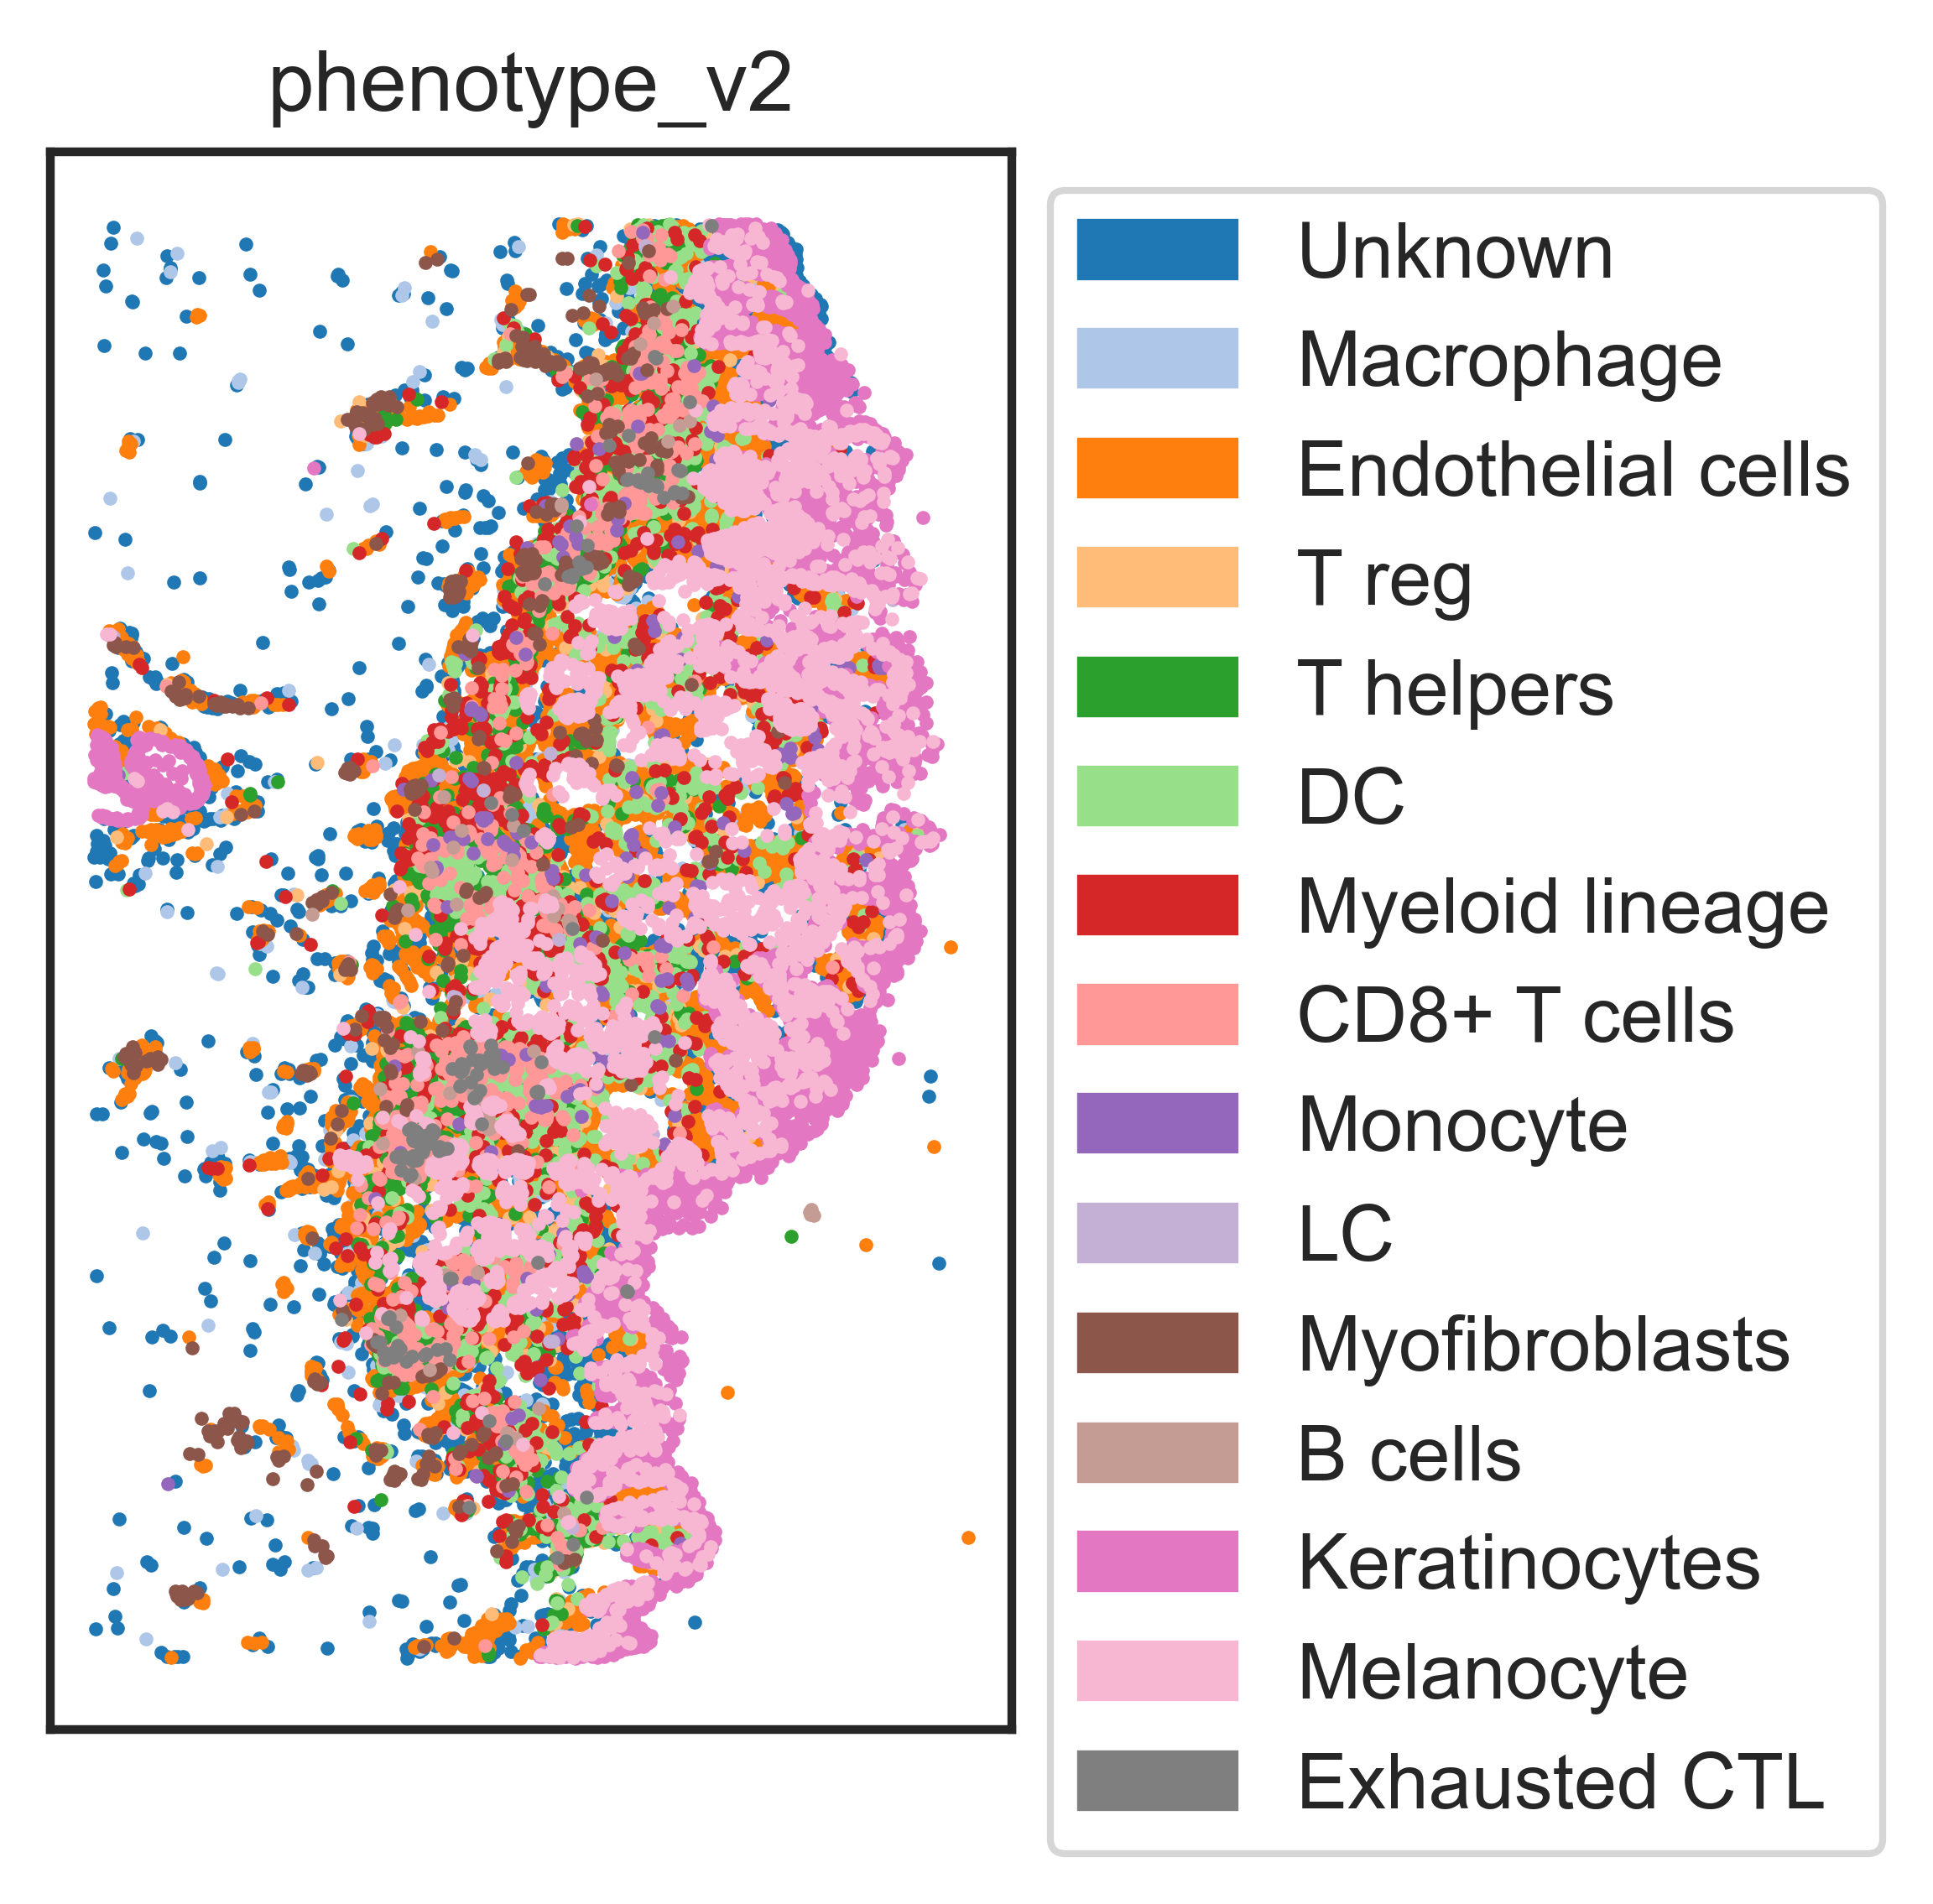

In [36]:
sm.pl.spatial_scatterPlot(adata=tmp, colorBy=['phenotype_v2'], x_coordinate='X_centroid', 
                          y_coordinate='Y_centroid',dpi=600,
                          imageid='MELid', layer=None, subset='MEL14', s=4, figsize=(4,4),vmin=0.1,vmax=0.9)
                         #fileName='MEL18_RCN_whole_slide_celltypes.png', saveDir='C:/Users/tav9/Dropbox (HMS)/test/test/')

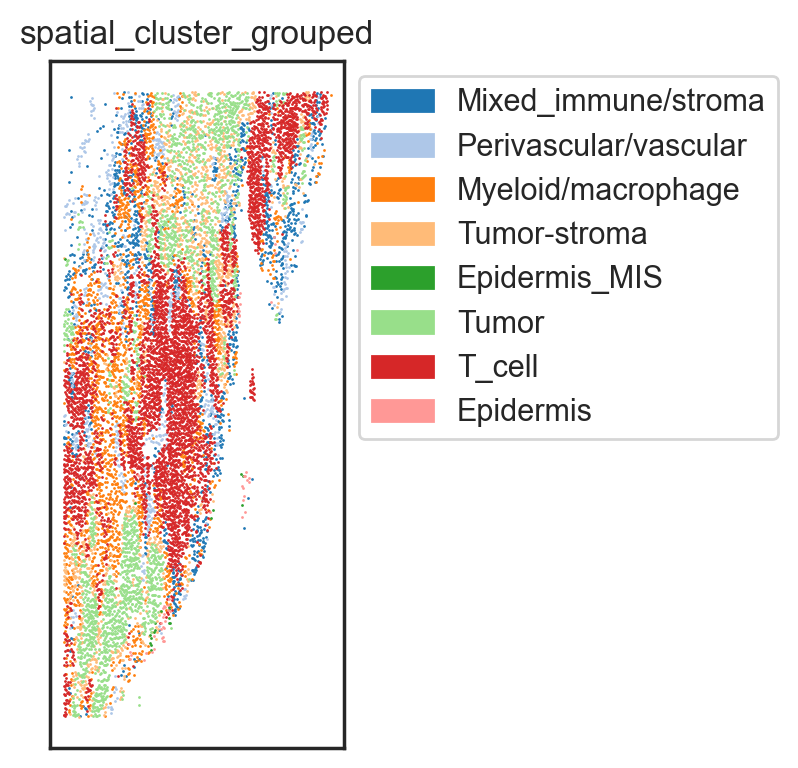

In [10]:
mel=['MEL25']
MEL25=adata[(adata.obs['MELid'].isin(mel))]

tmp = MEL25[MEL25.obs['Y_centroid'] > 34100 ]
tmp = tmp[tmp.obs['Y_centroid'] < 36000 ]

tmp = tmp[tmp.obs['X_centroid'] < 27000 ]
tmp = tmp[tmp.obs['X_centroid'] > 12000 ]

sm.pl.spatial_scatterPlot(adata=tmp, colorBy=['spatial_cluster_grouped'], x_coordinate='X_centroid', 
                          y_coordinate='Y_centroid',
                          imageid='MELid', layer=None, subset='MEL25', s=1, figsize=(4,4),vmin=0.1,vmax=0.9)

In [167]:
mel=['MEL18']
MEL18=adata[(adata.obs['MELid'].isin(mel))]

tmp = MEL18[MEL18.obs['Y_centroid'] > 12000 ]
tmp = tmp[tmp.obs['Y_centroid'] < 22000 ]

tmp = tmp[tmp.obs['X_centroid'] < 40000 ]
tmp = tmp[tmp.obs['X_centroid'] > 10000 ]

#customColors= {'Mixed_immune/stroma':'#b3ffe8',
#'Myeloid/macrophage':'#0479b0',
#'Perivascular/vascular':'#d7f5ec',
#'T_cell':'#6787a3',
#'Tumor-stroma':'#0f9444',
#'Tumor':'#005e26',
#'Epidermis':'#0f9444',
#'Epidermis_MIS':'#fab14b'}

customColors ={'Tumor' : '#bd0909',
                    'T_cell' : '#112e66',
                    'Epidermis' : '#0678bf',
               'Perivascular/vascular':'#9d9fa1',
               'Mixed_immune/stroma':'#e89b02',
               'Myeloid/macrophage':'#63b34d',
               'Tumor-stroma':'#d53de0',
               'Epidermis_MIS':'#704811'}


sm.pl.spatial_scatterPlot(adata=tmp, colorBy=['spatial_cluster_grouped'], x_coordinate='X_centroid', 
                          y_coordinate='Y_centroid',customColors=customColors,dpi=600,
                          imageid='MELid', layer=None, subset='MEL18', s=1, figsize=(10,7),vmin=0.1,vmax=0.9,
                         fileName='MEL18_RCN_whole_slide.png', saveDir='C:/Users/tav9/Dropbox (HMS)/test/test/')

Saved plot to C:/Users/tav9/Dropbox (HMS)/test/test/MEL18_RCN_whole_slide.png


In [168]:
sm.pl.spatial_scatterPlot(adata=tmp, colorBy=['phenotype_v2'], x_coordinate='X_centroid', 
                          y_coordinate='Y_centroid',dpi=600,
                          imageid='MELid', layer=None, subset='MEL18', s=1, figsize=(10,7),vmin=0.1,vmax=0.9,
                         fileName='MEL18_RCN_whole_slide_celltypes.png', saveDir='C:/Users/tav9/Dropbox (HMS)/test/test/')

Saved plot to C:/Users/tav9/Dropbox (HMS)/test/test/MEL18_RCN_whole_slide_celltypes.png


In [166]:
mel=['MEL18']
MEL18=adata[(adata.obs['MELid'].isin(mel))]

tmp = MEL18[MEL18.obs['Y_centroid'] > 17500 ]
tmp = tmp[tmp.obs['Y_centroid'] < 18400 ]

tmp = tmp[tmp.obs['X_centroid'] < 24900 ]
tmp = tmp[tmp.obs['X_centroid'] > 23500 ]

#customColors= {'Mixed_immune/stroma':'#b3ffe8',
#'Myeloid/macrophage':'#0479b0',
#'Perivascular/vascular':'#d7f5ec',
#'T_cell':'#6787a3',
#'Tumor-stroma':'#0f9444',
#'Tumor':'#005e26',
#'Epidermis':'#0f9444',
#'Epidermis_MIS':'#fab14b'}

customColors ={'Tumor' : '#bd0909',
                    'T_cell' : '#112e66',
                    'Epidermis' : '#0678bf',
               'Perivascular/vascular':'#9d9fa1',
               'Mixed_immune/stroma':'#e89b02',
               'Myeloid/macrophage':'#63b34d',
               'Tumor-stroma':'#d53de0',
               'Epidermis_MIS':'#704811'}

sm.pl.spatial_scatterPlot(adata=tmp, colorBy=['spatial_cluster_grouped'], x_coordinate='X_centroid', 
                          y_coordinate='Y_centroid',customColors=customColors,dpi=600,
                          imageid='MELid', layer=None, subset='MEL18', s=25, figsize=(9.5,6),vmin=0.1,vmax=0.9,
                         fileName='MEL18_RCN_exemplaryregion.png', saveDir='C:/Users/tav9/Dropbox (HMS)/test/test/')

Saved plot to C:/Users/tav9/Dropbox (HMS)/test/test/MEL18_RCN_exemplaryregion.png


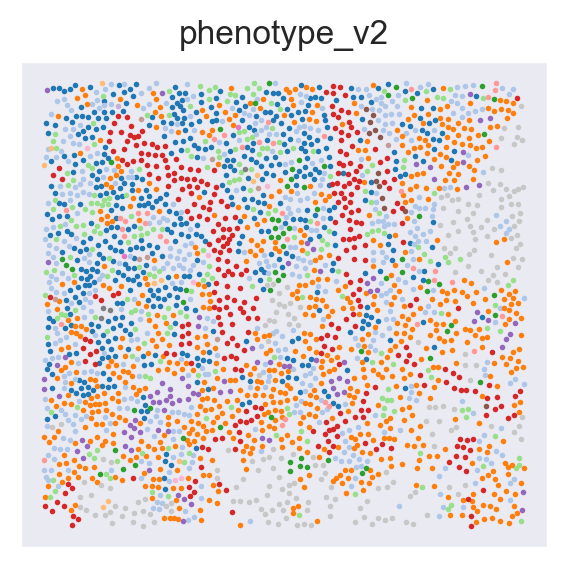

In [132]:
sm.pl.spatial_scatterPlot(adata=tmp, colorBy=['phenotype_v2'], x_coordinate='X_centroid', 
                          y_coordinate='Y_centroid',
                          imageid='MELid', layer=None, subset='MEL18', s=3, figsize=(3,3),vmin=0.1,vmax=0.9, plotLegend=None)